In [5]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
solve_ivp?

In [7]:
C0 = np.array([5000])
def funcion(t, C, r) :
    return r*C

Solve ivp de 0 a 10 meses con una inversión inicial de 5,000 pesos.

In [8]:
t = [0, 6]
r = 0.01
r = np.array([0.01])
a = solve_ivp(funcion, t, C0,  args=(r,), max_step=0.01)

In [9]:
a

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  6.000e+00  6.000e+00]
        y: [[ 5.000e+03  5.001e+03 ...  5.309e+03  5.309e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3608
     njev: 0
      nlu: 0

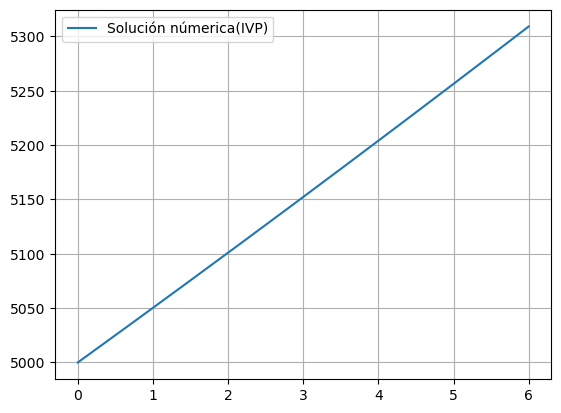

In [10]:
plt.figure()
plt.plot(a.t, a.y[0, :], label="Solución númerica(IVP)")
plt.legend(loc="best")
plt.grid()

## Para una simulación de 36 meses

Si el depósito adicional es semestral, sólo se debe simular de 6 en 6 meses.

1. Simular 6 meses.
2. Tomar último valor de respuesta
3. Sumarle el depósito adicional
4. Repetir 1 a 3 hasta terminar los 36 meses

In [11]:
deposito_inicial = 3000
deposito_adicional = 10000
tasa = 0.015
tiempo = 36
w = 0
h = np.array([deposito_inicial])
Dep = deposito_adicional
while w < tiempo/6 :
    w += 1
    t = [0, 6]
    r = tasa
    a = solve_ivp(funcion, t, h,  args=(r,), max_step=0.01)
    h = np.array([a.y[0, -1] + Dep])
    print(h)

[13282.52285112]
[24533.39492642]
[36843.80982047]
[50313.54921928]
[65051.79167768]
[81177.99756266]


[1419.06754859]
[2013.75270747]
[2857.65111806]
[4055.19996684]
[5754.60267601]
[8166.16991257]
36
1000
0.01
0

[3419.06754859]
[6851.88780466]
[11723.29163019]
[18636.1427151]
[28445.94535795]
[42366.71794652]
36
1000
0.01
2000

[6419.06754859]
[14109.09045044]
[25021.75239838]
[40507.55683748]
[62482.95938086]
[93667.53999745]
36
1000
0.01
5000

[2013.75270747]
[4055.19996684]
[8166.16991257]
[16444.6467711]
[33115.45195869]
[66686.33104093]
36
1000
0.02
0

[4013.75270747]
[10082.70538179]
[22304.0752612]
[46914.89194486]
[96474.99067465]
[196276.77367427]
36
1000
0.02
2000

[7013.75270747]
[19123.9635042]
[43510.93328414]
[92620.25970551]
[191514.29874859]
[390662.43762429]
36
1000
0.02
5000

[7095.33774297]
[10068.76353735]
[14288.25559032]
[20275.99983422]
[28773.01338003]
[40830.84956284]
36
5000
0.01
0

[9095.33774297]
[14906.89863454]
[23153.89610244]
[34856.94258248]
[51464.35606197]
[75031.39759679]
36
5000
0.01
2000

[12095.33774297]
[22164.10128032]
[36452.35687063]
[56728.

C:\Users\corre\AppData\Local\Temp\ipykernel_13064\3634739301.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[16271.87101445]
[52954.75726217]
[172334.59595429]
[560841.26333905]
[1825187.33932666]
[5939842.59254554]
[19330470.5024055]
[62908584.53274819]
[2.04728075e+08]
[6.66261765e+08]
60
5000
0.02
0

[18271.87101445]
[61463.50566795]
[202025.24726493]
[659465.75303141]
[2148148.33435462]
[6992878.5233041]
[22759443.47018205]
[74069745.7014867]
[2.4105267e+08]
[7.8447759e+08]
60
5000
0.02
2000

[21271.87101445]
[74226.62827662]
[246561.22423091]
[807402.48756996]
[2632589.82689661]
[8572432.41944215]
[27902902.92184763]
[90811487.45459604]
[2.95539562e+08]
[9.61801327e+08]
60
5000
0.02
5000



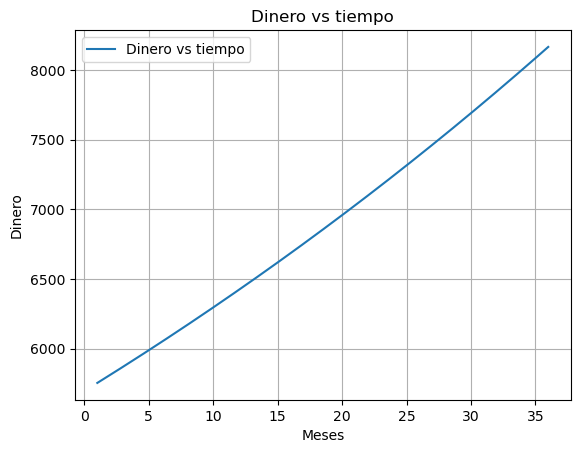

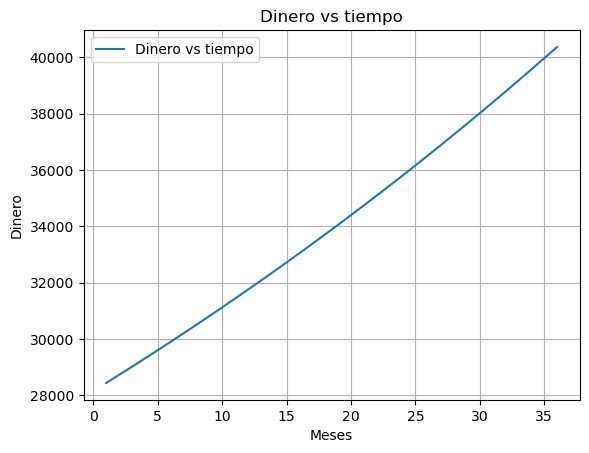

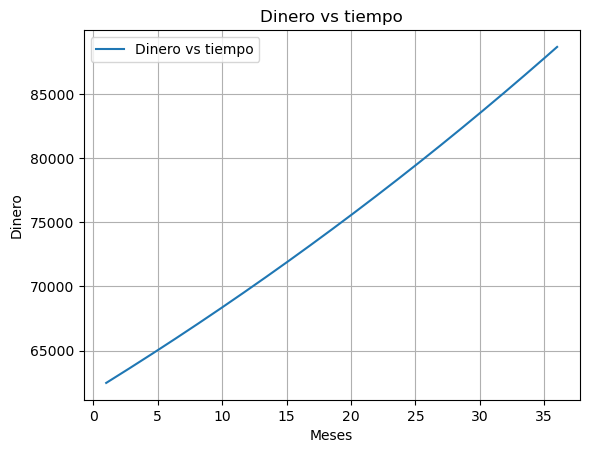

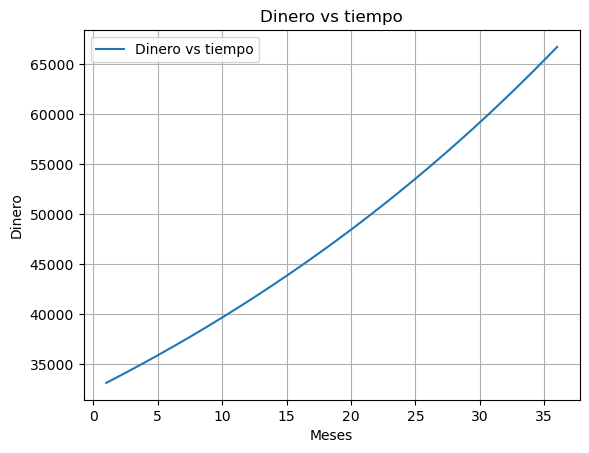

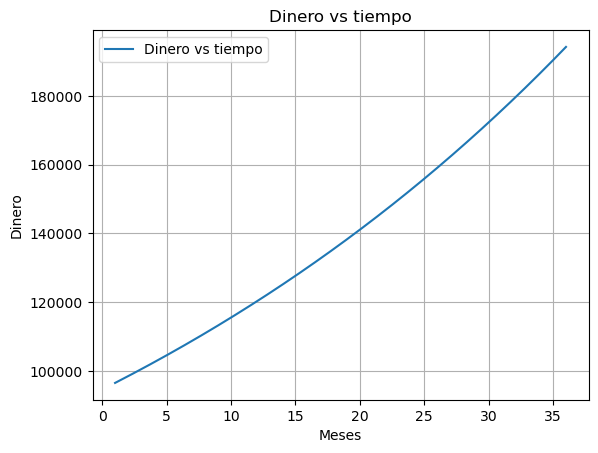

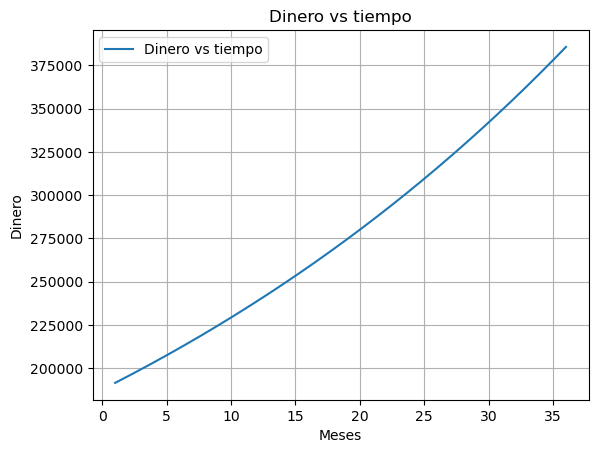

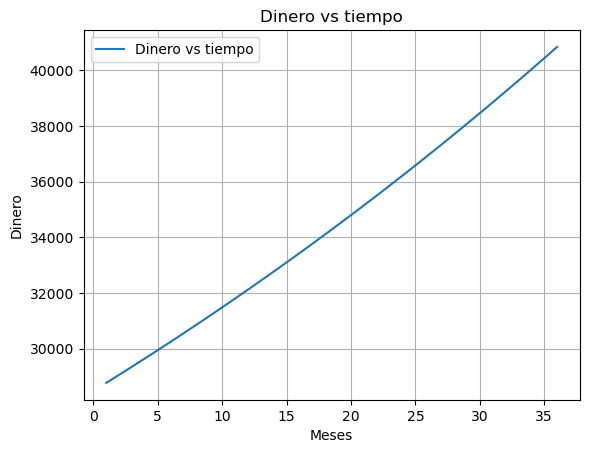

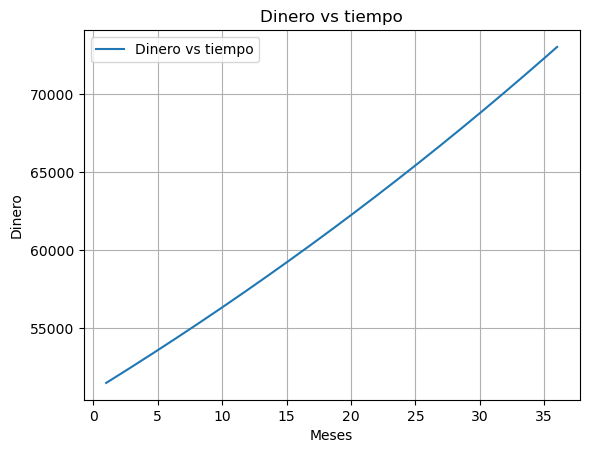

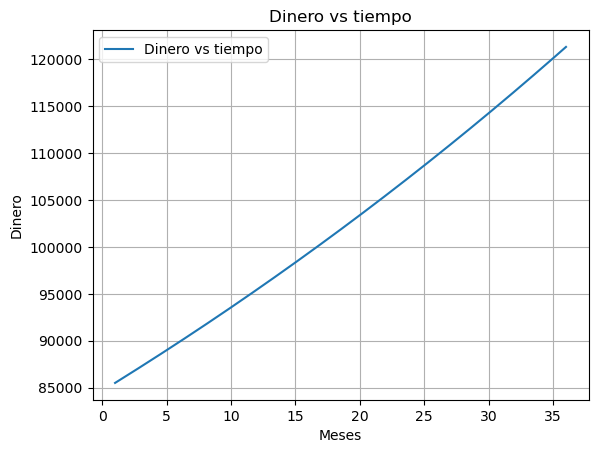

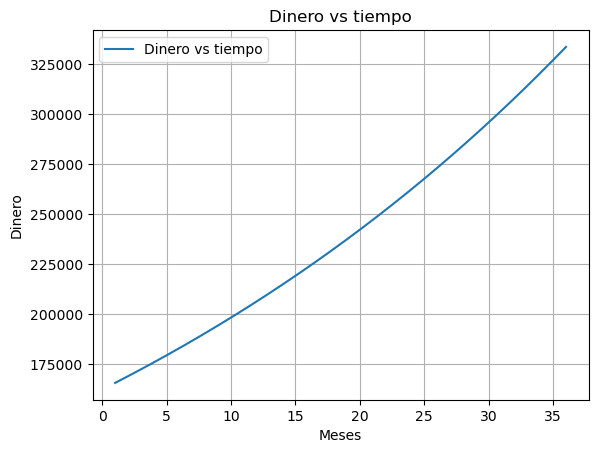

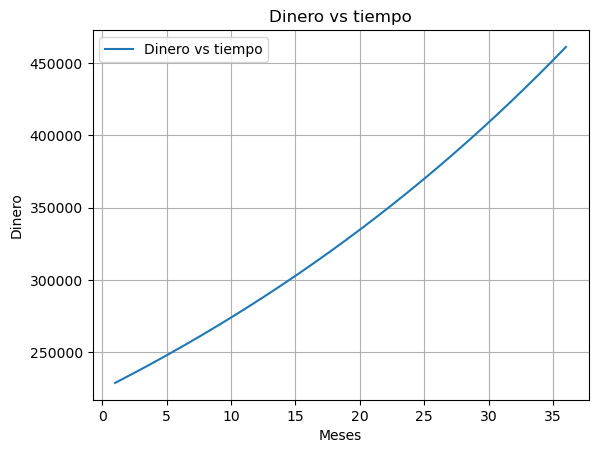

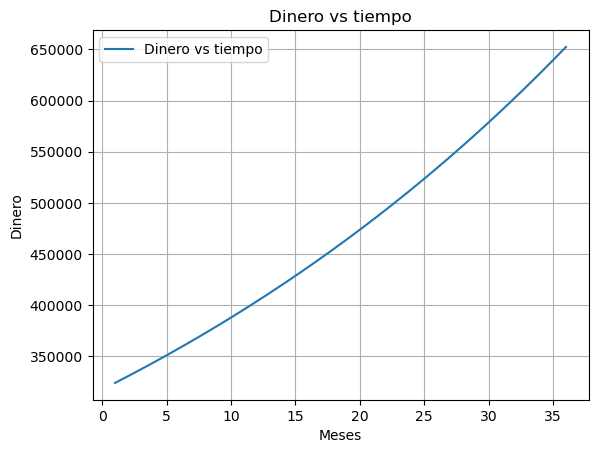

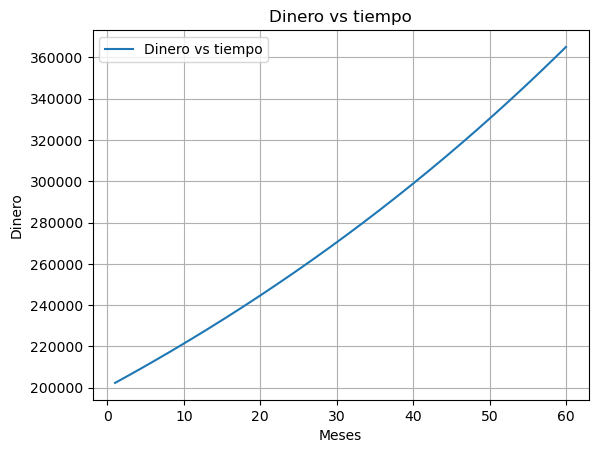

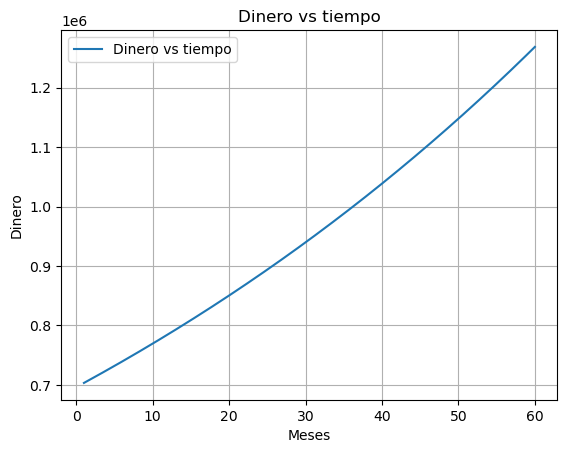

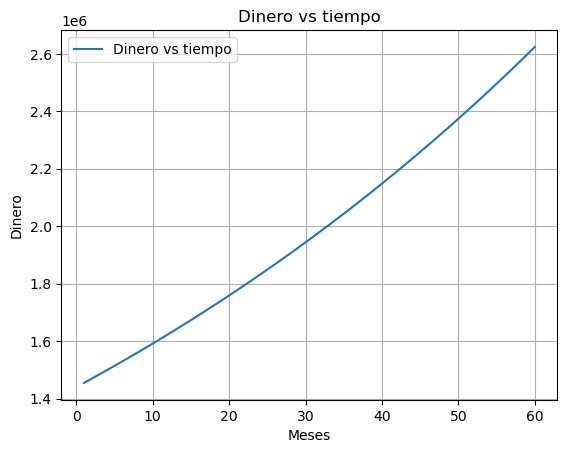

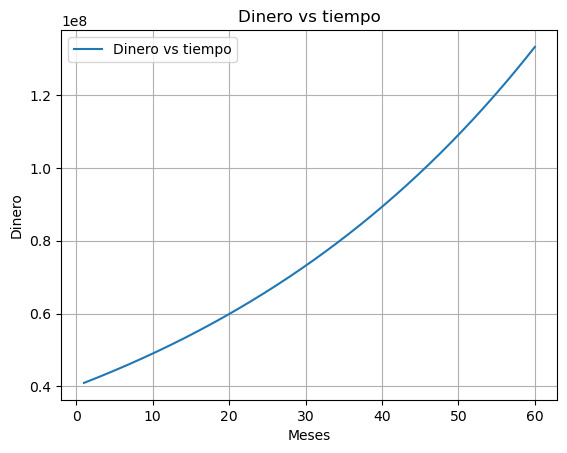

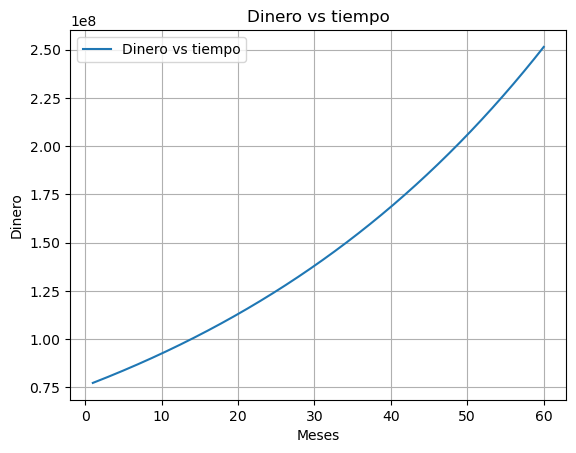

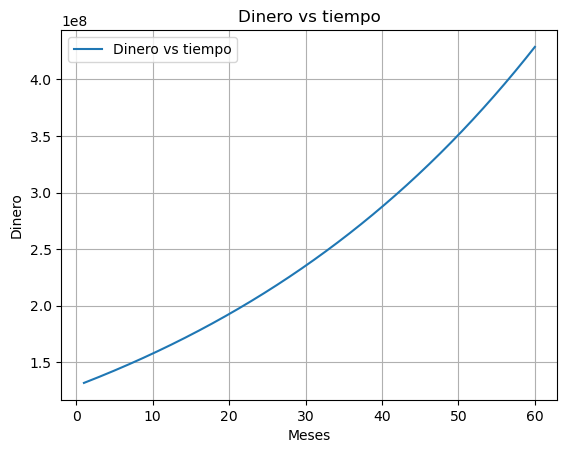

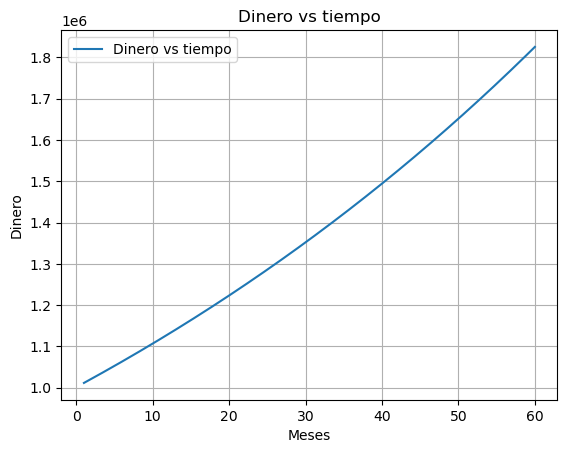

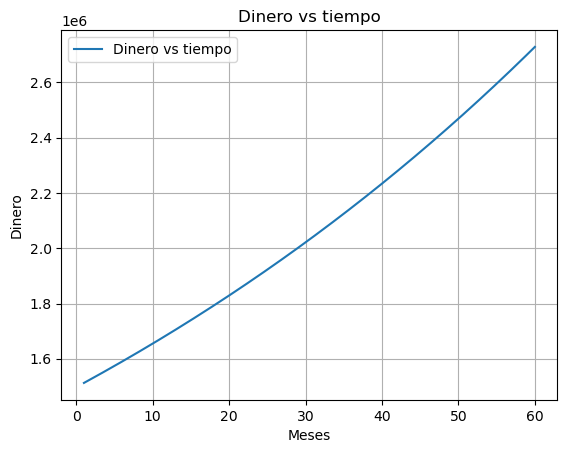

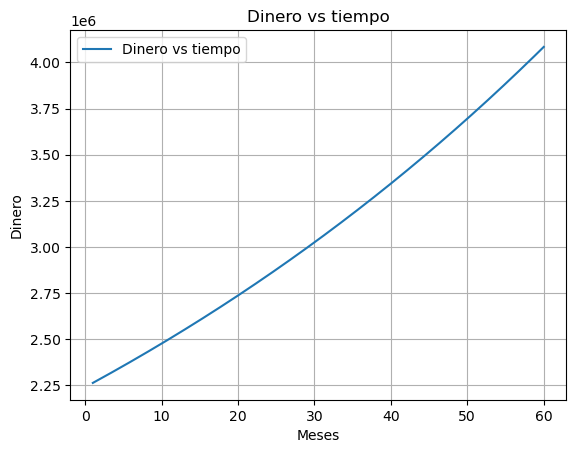

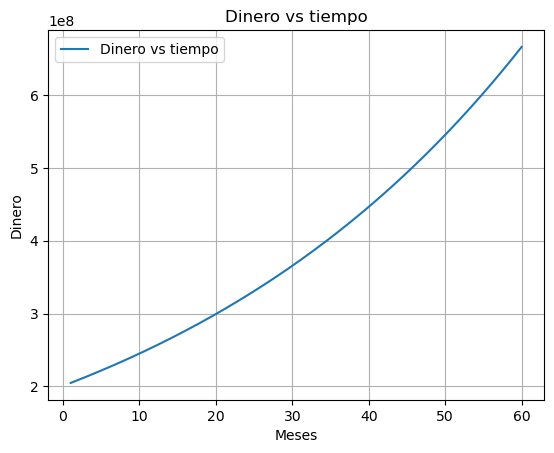

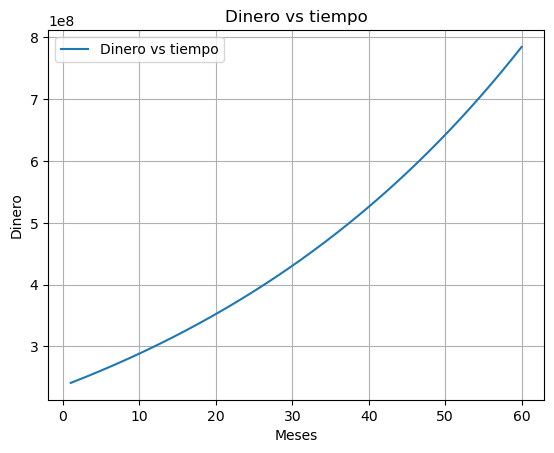

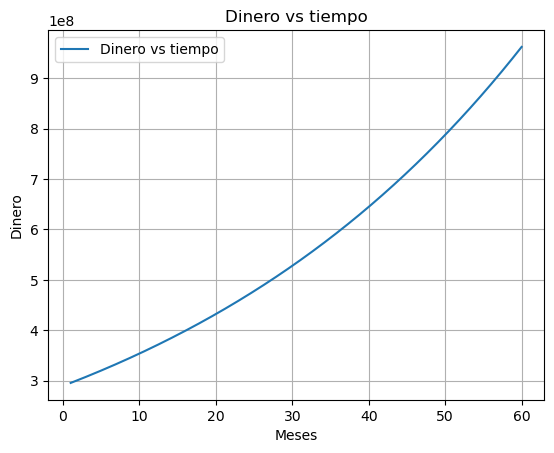

In [21]:
tiempo = [36, 60]
deposito_inicial = [1000, 5000]
r_array = [0.01, 0.02]
depositos_adicionales = [0, 2000, 5000]
h = np.array([deposito_inicial])
lef = []
for t in tiempo:
    for di in deposito_inicial:
        for interes in r_array:
            for da in depositos_adicionales:
                w = 0
                h = np.array([di])
                while w < t/6 :
                    w += 1
                    tspan = [1, t]
                    r = interes
                    a = solve_ivp(funcion, tspan, h,  args=(r,), max_step=0.01)
                    h = np.array([a.y[0, -1] + da])
                    print(h)
                plt.figure()
                plt.plot(a.t, a.y[0, :], label="Dinero vs tiempo")
                plt.title("Dinero vs tiempo")
                plt.xlabel("Meses")
                plt.ylabel("Dinero")
                plt.legend(loc="best")                
                plt.grid()
                print(t)
                print(di)
                print(interes)               
                print(da)
                print("")
                
